In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
# Load dataset
x_train, x_test, y_train, y_test = np.load('regression_data.npy', allow_pickle=True)

# Reshape targets
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

# Add bias term (column of ones)
train_data = np.hstack((x_train, np.ones((x_train.shape[0], 1))))
test_data = np.hstack((x_test, np.ones((x_test.shape[0], 1))))

N = train_data.shape[0]
D = train_data.shape[1]

train_data_df = pd.DataFrame(train_data)
print(train_data_df.head())
print(f"The test data has {N} rows and {D} columns.")

          0    1
0  0.488325  1.0
1 -1.116770  1.0
2  0.015053  1.0
3 -0.072720  1.0
4 -0.192071  1.0
The test data has 750 rows and 2 columns.


In [4]:
# ==============================
# Task 1: Standard Linear Regression (Gradient Descent)
# ==============================
def linear_regression_train(x_train, y_train, lr=1e-3, iterations=7000):
    weight = np.random.randn(2)
    loss = np.zeros(iterations)
    N = x_train.shape[0]

    with tqdm(total=iterations, desc="Training", dynamic_ncols=True) as pbar:
        for i in range(iterations):
            y_pred = weight[0] * x_train[:, 0] + weight[1]  # y_pred = m*x + b

            loss[i] = np.mean((y_train - y_pred)**2)  # Compute MSE

            # Compute gradients
            m_gradient = -2 * np.sum((y_train - y_pred) * x_train[:, 0]) / N  # Compute gradient for weight
            b_gradient = -2 * np.sum(y_train - y_pred) / N  # Compute gradient for bias

            # Update weights
            weight[0] -= lr * m_gradient  # Apply gradient descent for weight
            weight[1] -= lr * b_gradient  # Apply gradient descent for bias

            pbar.set_postfix(m=f"{weight[0]:.4f}", b=f"{weight[1]:.4f}", loss=f"{loss[i]:.4f}")
            pbar.update(1) 
        return weight, loss

weight_standard, loss_standard = linear_regression_train(train_data, y_train)

print("\n=== Standard Linear Regression Parameters ===")
print(f'Weight (m): {weight_standard[0]}')  # Print weight[0]
print(f'Bias (b): {weight_standard[1]}')  # Print weight[1]


Training: 100%|██████████| 7000/7000 [00:06<00:00, 1056.40it/s, b=-0.3338, loss=99.3424, m=52.7434] 


=== Standard Linear Regression Parameters ===
Weight (m): 52.74342236734251
Bias (b): -0.33377936258693275


In [5]:
# ==============================
# Task 2: Compute MSE
# ==============================
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)  # Compute MSE formula

y_pred_standard = x_test[:, 0] * weight_standard[0] + weight_standard[1] # Compute predictions for test data
mse_standard = compute_mse(y_test, y_pred_standard)

print("\n=== Mean Squared Error (Standard Regression) ===")
print(f'MSE: {mse_standard}')



=== Mean Squared Error (Standard Regression) ===
MSE: 110.43782679931013


In [6]:
# ==============================
# Task 3: Ridge Regression (Gradient Descent)
# ==============================
def ridge_regression_train(x_train, y_train, lr=1e-3, iterations=7000, lambda_reg=0.1):
    weight = np.random.randn(2)
    loss = np.zeros(iterations)
    N = x_train.shape[0]
    
    with tqdm(total=iterations, desc="Training Ridge Regression") as pbar:
        for i in range(iterations):
            y_pred = weight[0] * x_train[:, 0] + weight[1]  # Compute predicted values

            loss[i] = np.mean((y_train - y_pred)**2) + lambda_reg * weight[0]**2  # Compute MSE with regularization term

            # Compute gradients with regularization
            m_gradient = -2 * np.sum((y_train - y_pred) * x_train[:, 0])/N + 2*lambda_reg*weight[0]  # Compute weight gradient with regularization
            b_gradient = -2 * np.sum(y_train - y_pred)/N  # Compute bias gradient

            # Update weights
            weight[0] -= lr * m_gradient # Apply gradient descent for weight
            weight[1] -= lr * b_gradient  # Apply gradient descent for bias

            pbar.set_postfix(m=f"{weight[0]:.4f}", b=f"{weight[1]:.4f}", loss=f"{loss[i]:.4f}")
            pbar.update(1) 

        return weight, loss

weight_ridge, loss_ridge = ridge_regression_train(train_data, y_train, lambda_reg=0.1)

print("\n=== Ridge Regression Parameters ===")
print(f'Weight (m): {weight_ridge[0]}')
print(f'Bias (b): {weight_ridge[1]}')

y_pred_ridge = weight_ridge[0]*x_test[:, 0] + weight_ridge[1]  # Compute predictions for test data
mse_ridge = compute_mse(y_test, y_pred_ridge)

print("\n=== Mean Squared Error (Ridge Regression) ===")
print(f'MSE: {mse_ridge}')

Training Ridge Regression: 100%|██████████| 7000/7000 [00:06<00:00, 1137.00it/s, b=-0.4344, loss=350.5453, m=47.6272]


=== Ridge Regression Parameters ===
Weight (m): 47.627210226184786
Bias (b): -0.4344245396430874

=== Mean Squared Error (Ridge Regression) ===
MSE: 122.20206906667423


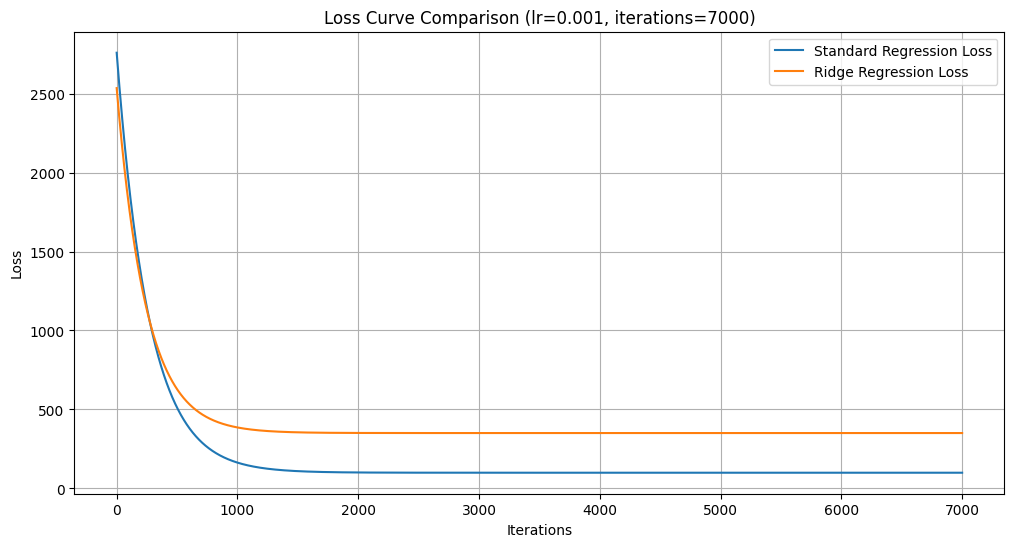

In [7]:
# ==============================
# Task 4: Plot Loss Curve
# ==============================
def plot_loss_curve(loss_standard, loss_ridge, lr, iterations):
    plt.figure(figsize=(12, 6))
    plt.plot(loss_standard, label='Standard Regression Loss')
    plt.plot(loss_ridge, label='Ridge Regression Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Loss Curve Comparison (lr={lr}, iterations={iterations})')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss_curve(loss_standard, loss_ridge, lr=1e-3, iterations=7000)

Training Ridge Regression: 100%|██████████| 7000/7000 [00:07<00:00, 952.74it/s, b=-0.2766, loss=484.4551, m=36.2386] 


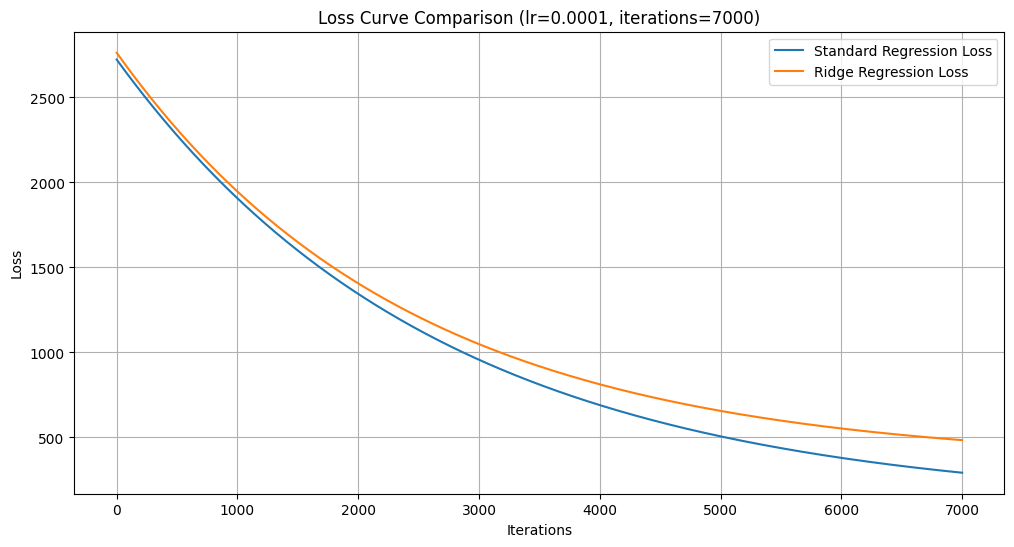

In [8]:
# Different learning rates

weight_standard, loss_standard = linear_regression_train(train_data, y_train, lr=1e-4, iterations=7000)
weight_ridge, loss_ridge = ridge_regression_train(train_data, y_train, lr=1e-4, iterations=7000)
plot_loss_curve(loss_standard, loss_ridge, lr=1e-4, iterations=7000)

Training Ridge Regression: 100%|██████████| 3000/3000 [00:02<00:00, 1169.40it/s, b=-0.4439, loss=350.5551, m=47.5301]


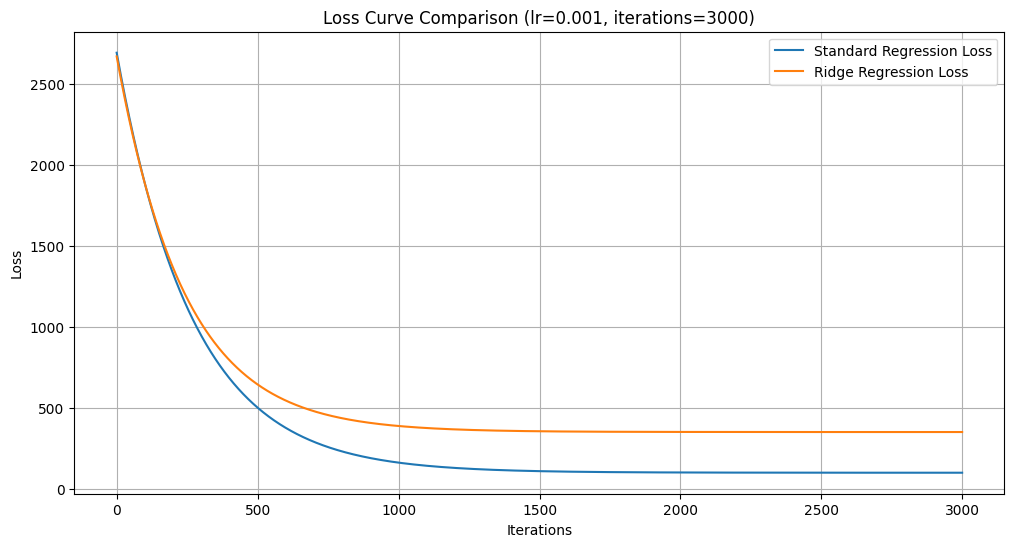

In [9]:
# Different iterations

weight_standard, loss_standard = linear_regression_train(train_data, y_train, lr=1e-3, iterations=3000)
weight_ridge, loss_ridge = ridge_regression_train(train_data, y_train, lr=1e-3, iterations=3000)
plot_loss_curve(loss_standard, loss_ridge, lr=1e-3, iterations=3000)

In [10]:
# ==============================
# Task 5: Closed-form Ridge Regression
# ==============================
def closed_form_ridge(x_train, y_train, lambda_reg=0.1):
    # w = (λI + X^T * X)^(-1) * X^T * y
    I = np.eye(x_train.shape[1])  # Identity matrix
    I[-1, -1] = 0 # Not regularize bias
    w_closed_form = np.linalg.inv(lambda_reg * I + x_train.T @ x_train) @ x_train.T @ y_train  # Compute closed-form solution (Equation 4.27)
    return w_closed_form

weight_closed_form = closed_form_ridge(train_data, y_train, lambda_reg=0.1)
y_pred_closed_form = test_data @ weight_closed_form  # Compute predictions for test data
mse_closed_form = compute_mse(y_test, y_pred_closed_form)

print("\n=== Closed-form Ridge Regression Parameters ===")
print(f'Weight (m): {weight_closed_form[0]}')
print(f'Bias (b): {weight_closed_form[1]}')
print("\n=== Mean Squared Error (Closed-form Ridge Regression) ===")
print(f'MSE: {mse_closed_form}')



=== Closed-form Ridge Regression Parameters ===
Weight (m): 52.735986986264884
Bias (b): -0.3339074989362677

=== Mean Squared Error (Closed-form Ridge Regression) ===
MSE: 110.41535937243957


In [11]:
# ==============================
# Task 6: Predictive Distribution
# ==============================

def predictive_distribution(x_train, y_train, test_data, lambda_reg):
    D = x_train.shape[1]
    
    # 計算 closed-form Ridge Regression 參數
    w_closed_form = closed_form_ridge(x_train, y_train, lambda_reg=lambda_reg)

    # 計算 sigma^2 (資料的variance)：用訓練資料上的MSE估算
    sigma_square = np.mean((y_train - x_train @ w_closed_form)**2)

    alpha = lambda_reg
    beta = 1 / sigma_square

    # posterior covariance
    S_N_inv = alpha * np.eye(D)
    S_N_inv[-1, -1] = 0  # bias項不正則化
    S_N_inv = S_N_inv + beta * x_train.T @ x_train
    S_N = np.linalg.inv(S_N_inv)

    predictive_mean = test_data @ w_closed_form # Compute predictive mean
    predictive_variances = sigma_square + np.diag(test_data @ S_N @ test_data.T)
    predictive_variance_mean = predictive_variances.mean()
    
    print("\n=== Predictive Distribution ===")
    print(f'Predictive Mean (first 5 values): {predictive_mean[:5]}')
    print(f'Predictive Variance: {predictive_variance_mean}')
    
    return predictive_mean , predictive_variances

predictive_mean , predictive_variances = predictive_distribution(train_data, y_train, test_data, lambda_reg=0.1)


=== Predictive Distribution ===
Predictive Mean (first 5 values): [-45.84242019  58.89769953 -49.12680109 -19.25254154  -0.73679187]
Predictive Variance: 99.62103620567123


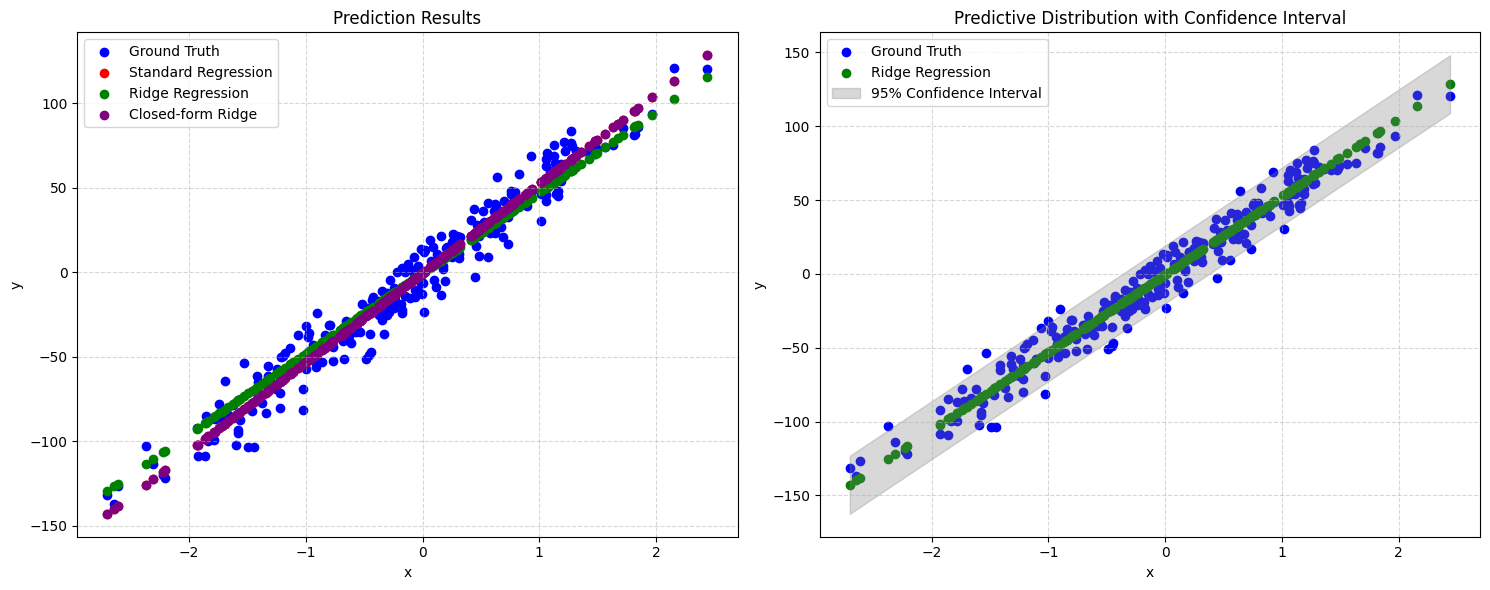

In [ ]:
# ==============================
# Task 7: Plot Predictions
# ==============================

# 排序資料
sorted_idx = np.argsort(x_test[:, 0])
x_sorted = x_test[sorted_idx, 0]

# 排序各模型的預測值
y_standard_sorted = y_pred_standard[sorted_idx]
y_ridge_sorted = y_pred_ridge[sorted_idx]
y_closed_form_sorted = y_pred_closed_form[sorted_idx]
predictive_mean_sorted = predictive_mean[sorted_idx]
predictive_std_sorted = np.sqrt(predictive_variances[sorted_idx])

# 設置圖形大小
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# =====================
# 左圖：Prediction Results
# =====================
axes[0].scatter(x_test[:, 0], y_test, color='blue', label='Ground Truth')

axes[0].scatter(x_sorted, y_standard_sorted, color='red', label='Standard Regression')
axes[0].scatter(x_sorted, y_ridge_sorted, color='green', label='Ridge Regression')
axes[0].scatter(x_sorted, y_closed_form_sorted, color='purple', label='Closed-form Ridge')

axes[0].set_title('Prediction Results')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].legend()

# ==============================
# Plot Confidence Intervals
# ==============================

# 95% 信賴區間
upper_bound = predictive_mean_sorted + 1.96 * predictive_std_sorted
lower_bound = predictive_mean_sorted - 1.96 * predictive_std_sorted

axes[1].scatter(x_test[:, 0], y_test, color='blue', label='Ground Truth')
axes[1].scatter(x_sorted, predictive_mean_sorted, color='green', label='Ridge Regression')

axes[1].fill_between(
    x_sorted,
    lower_bound,
    upper_bound,
    color='gray',
    alpha=0.3,
    label='95% Confidence Interval'
)

axes[1].set_title('Predictive Distribution with Confidence Interval')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].legend()

plt.tight_layout()
plt.show()
